### 1. Importing libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### 2. Importing the dataset

In [2]:
fraud_data=pd.read_csv('Fraud_check (2).csv')
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### 3. Data understanding

#### 3.1 Initial Analysis

In [3]:
fraud_data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [4]:
fraud_data.isna().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

### 4. Data preparation

### 4.1 Label encoding : Converting object datatypes to int

In [5]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
fraud_data['Undergrad']= label_encoder.fit_transform(fraud_data['Undergrad'])
fraud_data['Marital.Status']= label_encoder.fit_transform(fraud_data['Marital.Status'])
fraud_data['Urban']= label_encoder.fit_transform(fraud_data['Urban'])

In [6]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0


### 4.2 Converting output variable y from numeric to categorial

In [7]:
def target(x):
    if 0 <= x <= 30000:
        return 'risky'
    else:
        return 'good'

In [8]:
fraud_data['Taxable.Income'] = fraud_data['Taxable.Income'].apply(target)

In [9]:
fraud_data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,good,50047,10,1
1,1,0,good,134075,18,1
2,0,1,good,160205,30,1
3,1,2,good,193264,15,1
4,0,1,good,27533,28,0
...,...,...,...,...,...,...
595,1,0,good,39492,7,1
596,1,0,good,55369,2,1
597,0,0,good,154058,0,1
598,1,1,good,180083,17,0


In [10]:
fraud_data['Taxable.Income'].value_counts()

good     476
risky    124
Name: Taxable.Income, dtype: int64

### Label Encoding the output variable y

In [11]:
from sklearn import preprocessing
label_encoder= preprocessing.LabelEncoder()
fraud_data['Taxable.Income']= label_encoder.fit_transform(fraud_data['Taxable.Income'])

In [12]:
fraud_data['Taxable.Income'].value_counts()

0    476
1    124
Name: Taxable.Income, dtype: int64

In [40]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,0,50047,10,1
1,1,0,0,134075,18,1
2,0,1,0,160205,30,1
3,1,2,0,193264,15,1
4,0,1,0,27533,28,0


### Data Visualization

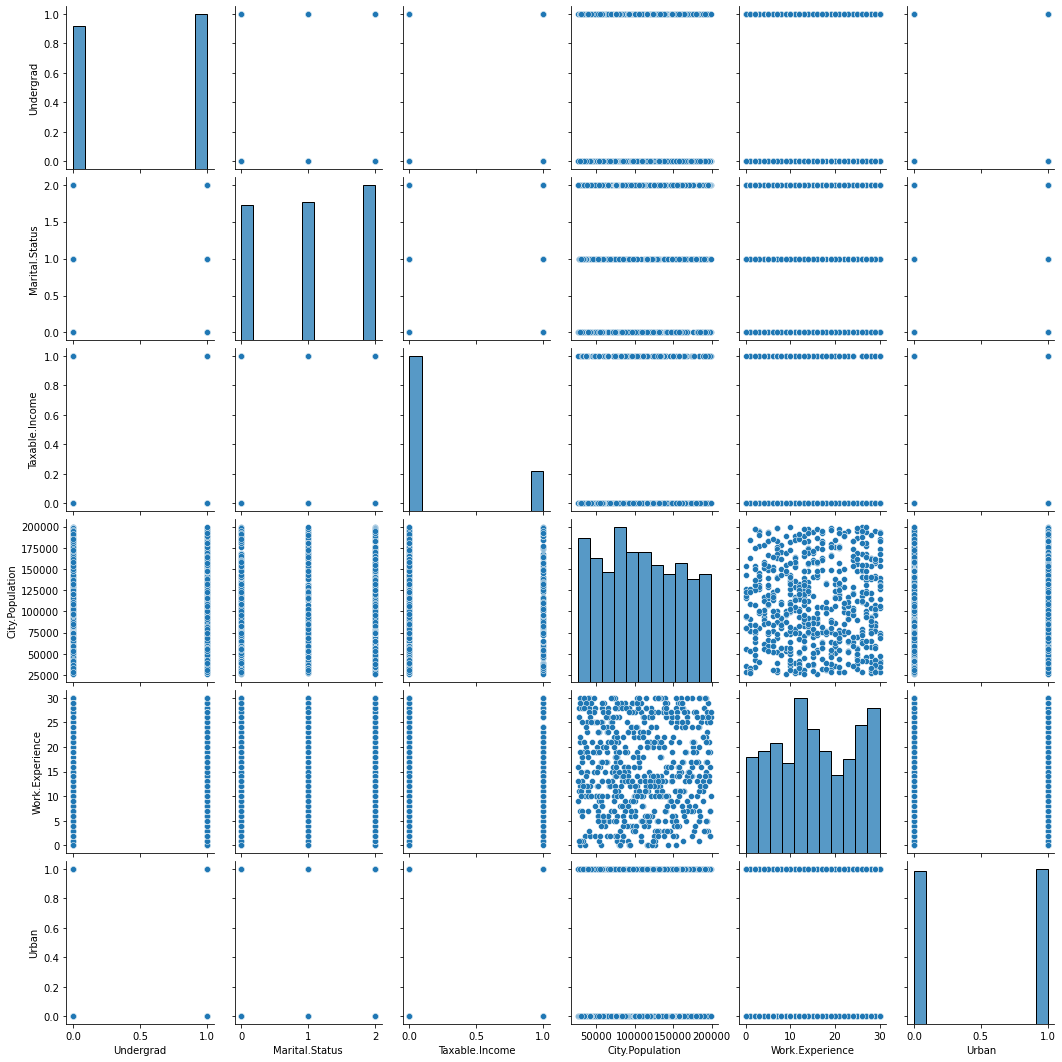

In [13]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=fraud_data)

### 5. Model building 

#### 5.1 Separate input and output features.

In [14]:
X=fraud_data.drop(labels='Taxable.Income', axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [15]:
y= fraud_data[['Taxable.Income']]

#### 5.2 Go for train test spit for Model Validation

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=12)

In [17]:
X_train.shape, X_test.shape

((480, 5), (120, 5))

In [18]:
y_train.shape , y_test.shape

((480, 1), (120, 1))

### 6. Model training

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='gini', max_depth=5) #pruning the tree
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100, max_depth=4)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=4)

### GridSearch CV

In [22]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf_model,param_grid = {'max_depth': [4,5,6,7,8],'criterion':['gini','entropy']},cv=5)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=4),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8]})

In [23]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [24]:
grid_search.best_score_

0.7645833333333333

### K-Fold CV

In [25]:
from sklearn.model_selection import KFold,cross_val_score
cv_scores= cross_val_score(estimator = rf_model,X = X,y=y,cv=5)
print('5 Fold CV Scores : ',cv_scores)
print('Mean Accuracy    : ',round(cv_scores.mean(),4))
print('STD Deviation    : ',round(cv_scores.std(),4))

5 Fold CV Scores :  [0.8        0.79166667 0.79166667 0.79166667 0.79166667]
Mean Accuracy    :  0.7933
STD Deviation    :  0.0033


### Plot tree

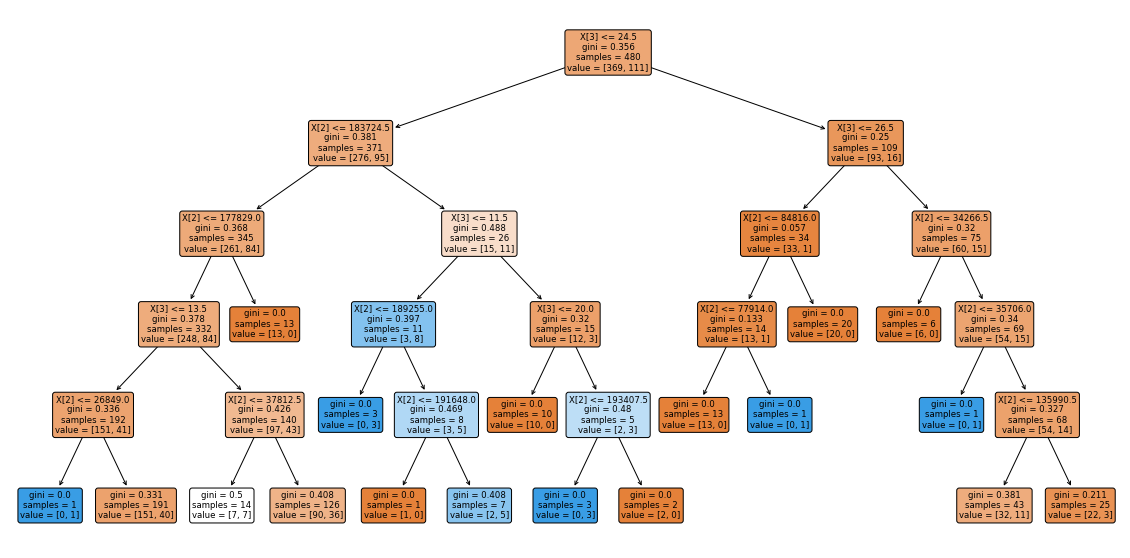

In [26]:
# Prepare a plot figure with set size.
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt
plt.figure(figsize = (20,10))

# Plot the decision tree.
plot_tree(dt_model,rounded = True,filled = True)# Display the tree plot figure.
plt.show()

###  Model Testing

#### Traing data

In [27]:
y_train_pred=rf_model.predict(X_train)

#### Testing data

In [28]:
y_test_pred=rf_model.predict(X_test)

### 8. Model evaluation

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report

In [30]:
accuracy_score(y_train,y_train_pred)

0.775

In [31]:
confusion_matrix(y_train,y_train_pred)

array([[369,   0],
       [108,   3]])

In [32]:
precision_score(y_train,y_train_pred,pos_label='positive', average='micro')

0.775

In [33]:
recall_score(y_train,y_train_pred, pos_label='positive', average='micro')

0.775

In [34]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.77      1.00      0.87       369
           1       1.00      0.03      0.05       111

    accuracy                           0.78       480
   macro avg       0.89      0.51      0.46       480
weighted avg       0.83      0.78      0.68       480



0.5135135135135135


Text(0, 0.5, 'True Positive Rate')

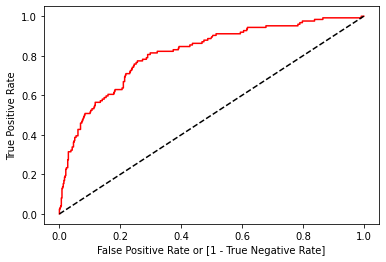

In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba(X)[:,1])

auc = roc_auc_score(y_train,y_train_pred)


print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)' %auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')




#### Test data

In [36]:
accuracy_score(y_test,y_test_pred)

0.8916666666666667

In [37]:
confusion_matrix(y_test,y_test_pred)

array([[107,   0],
       [ 13,   0]])

In [38]:
precision_score(y_test,y_test_pred, pos_label='positive', average='micro')

0.8916666666666667

In [39]:
recall_score(y_test,y_test_pred, pos_label='positive', average='micro' )

0.8916666666666667